Let’s import the libraries that we are going to use for data manipulation, visualization, training the model, etc.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import pandas as pd
from math import sqrt
%matplotlib inline
import numpy as np
import csv

# avoid alert
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# select the GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # SET A SINGLE GPU
# import library modules keras and tensorflow
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import keras
from tensorflow.keras import backend as K
from keras.layers import *
import tensorflow as tf

Using TensorFlow backend.


In [12]:
def transform_txt():
    with open('../../file/dataset.txt', "w") as output_file:
        with open('../../file/dataset.csv', "r") as input_file:
            [ output_file.write(" ".join(row)+'\n') for row in csv.reader(input_file)]
    output_file.close()

In [2]:
# load the dataset
dataset_throughput = pd.read_csv('../../data/data_segments.csv', header=0, low_memory=True)
#data_elapsed = pd.read_csv('../../data/data_elapsed.csv', header=0, low_memory=True)
# dataset_throughput.set_index('timestamp', inplace=True)
#dataset_throughput['downthpt'] = dataset_throughput['downthpt']*8
#dataset_throughput['elapsed'] = data_elapsed['elapsed'].values
dataset_throughput.shape
# dataset_throughput.sort_values('timestamp', inplace=True)
# remove duplicate rows
# dataset_throughput = data.drop_duplicates(keep=False)

(12048630, 17)

1. Feature selection

In [4]:
from yellowbrick.target import FeatureCorrelation
from sklearn.feature_selection import f_regression

In [6]:
dataset = dataset_throughput.iloc[:10000, :]
# columTitles = ['delta_user_time', 'received', 'connect_time', 'rate', 'delta_sys_time', 'request_ticks', 'iteration', 'year', 'month', 'day', 'weekday', 'hour', 'minute', 'second', 'tcp_mean_wind', 'delay','elapsed','downthpt']

columTitles = ['year', 
               'month', 
               'day',
               'hour',
               'minute',
               'second',  
               'weekday',
               'iteration', 
               'delta_user_time',
               'delta_sys_time', 
               'request_ticks',
               'connect_time', 
               'rate',
               'received', 
               'elapsed', 
               'max_download_rate',
               'downthpt']
dataset = dataset.reindex(columns=columTitles)

In [8]:
dataset.shape

(10000, 17)

In [9]:
# split into input and output
y = dataset['downthpt'].values
X = dataset.drop(columns = ['downthpt']).values
# y = y.astype('int')

1.1 Mutual Info-Regression

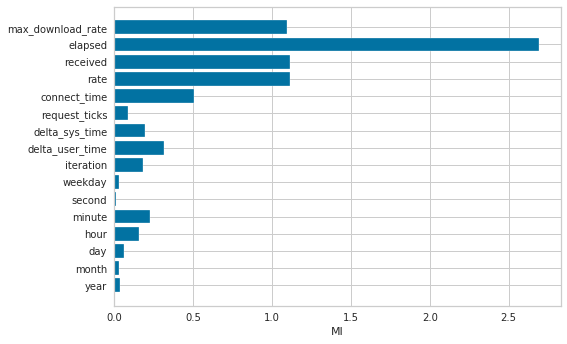

In [10]:
# Create a list of the feature names
features = dataset.columns.values[0:-1]

# Create a list of the discrete features
discrete = [False for _ in range(len(features))]
discrete[1] = True

# Instantiate the visualizer
visualizer = FeatureCorrelation(method='mutual_info-regression', labels=features)

visualizer.fit(X, y, discrete_features=discrete, random_state=1)
inf_mutual_reg = visualizer
plt.xlabel('MI')
# plt.savefig('./../output_file/feat_selec_mutual_infor.pdf')
# visualizer.show()
plt.show()

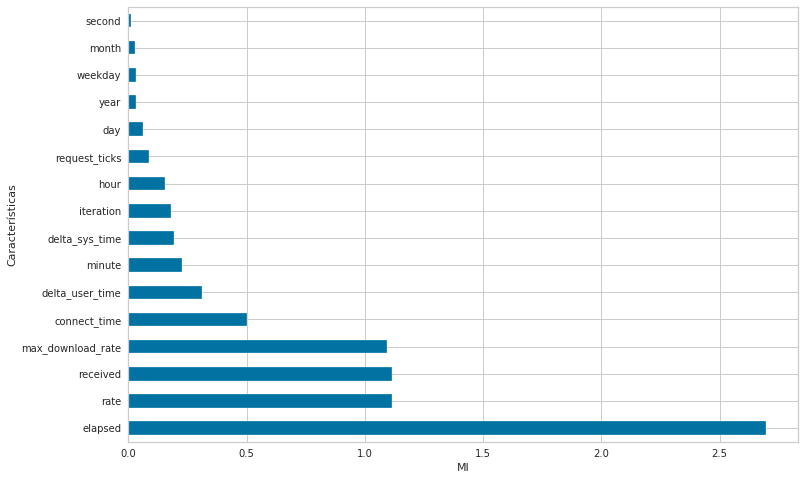

In [11]:
im = pd.Series(inf_mutual_reg.scores_, index=features)
plt.figure(figsize=(12,8))
im.nlargest(16).plot(kind='barh')
plt.ylabel('Características')
plt.xlabel('MI')
# plt.savefig('./../output_file/feat_selec_mutual_infor.eps')
plt.show()

In [4]:
columnsTitles = ['second',
                 'month',
                 'weekday',
                 'year',
                 'day',
                 'request_ticks',
                 'hour',
                 'iteration',
                 'delta_sys_time',
                 'minute',
                 'delta_user_time',
                 'connect_time',
                 'max_download_rate',
                 'received', 
                 'rate',
                 'elapsed', 
                 'downthpt']
dataset_throughput = dataset_throughput.reindex(columns=columnsTitles)

In [6]:
data_1 = dataset_throughput.loc[dataset_throughput.year == 2015]

In [7]:
data_2 = dataset_throughput.loc[dataset_throughput.year == 2016]

In [9]:
data_3 = dataset_throughput.loc[dataset_throughput.year == 2017]

In [10]:
data_4 = dataset_throughput.loc[dataset_throughput.year == 2018]

In [15]:
data_5 = dataset_throughput.loc[dataset_throughput.year == 2019]

In [17]:
data_5.shape

(30, 17)

In [11]:
year_1 = data_1.append(data_2, ignore_index=True, sort=False)

In [12]:
year_2 = year_1.append(data_3, ignore_index=True, sort=False)

In [13]:
year_3 = year_2.append(data_4, ignore_index=True, sort=False)

In [18]:
data_train = year_3.append(data_5, ignore_index=True, sort=False)

1.2 Person Correlation

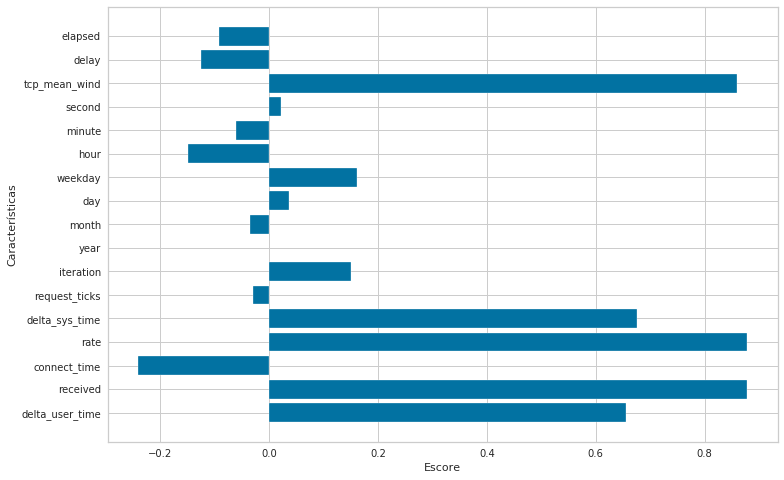

In [11]:
# Create a list of the feature names
features = dataset.columns.values[0:-1]

# Instantiate the visualizer
plt.figure(figsize=(12,8))
visualizer = FeatureCorrelation(labels=features)
visualizer.fit(X, y)        # Fit the data to the visualizer
corr_pearson = visualizer
# plt.figure(figsize=(12,8))
plt.ylabel('Características')
plt.xlabel('Escore')
plt.savefig('./../output_file/feat_selec_pearson_corr.eps')
# visualizer.show()         # Finalize and render the figure
plt.grid(True)
plt.show()

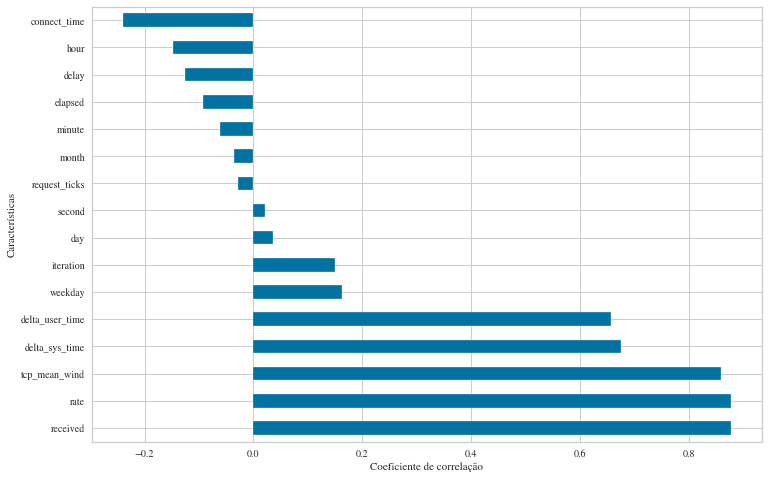

In [23]:
pc = pd.Series(corr_pearson.scores_, index=features)
plt.figure(figsize=(12,8))
pc.nlargest(17).plot(kind='barh')
plt.ylabel('Características')
plt.xlabel('Coeficiente de correlação')
plt.savefig('./../output_file/feat_selec_pearson_corr.eps')
plt.show()

In [4]:
## Pearson Correlation ##
columnsTitles = ['year',
                 'connect_time',
                 'hour',
                 'delay',
                 'elapsed',
                 'minute',
                 'month',
                 'request_ticks',
                 'second',
                 'day',
                 'iteration',
                 'weekday',
                 'delta_user_time',
                 'delta_sys_time',
                 'tcp_mean_wind',
                 'rate',
                 'received',
                 'downthpt']
dataset_throughput = dataset_throughput.reindex(columns=columnsTitles)

Here, downthpt is transformed for Mb/s

Get session downthpt up to 1MB

In [5]:
import json
import random
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

In [6]:
TRAIN_SIZE = int(len(dataset_throughput) * 0.80) # 80% train set
VALID_SIZE = int(len(dataset_throughput) * 0.90) # 10% valid and test set

In [7]:
data_train = dataset_throughput.iloc[:TRAIN_SIZE, :]
print('\nTraining Set: ', data_train.shape)

data_val = dataset_throughput.iloc[TRAIN_SIZE:VALID_SIZE, :]
print('\nValidation Set: ', data_val.shape)

data_test = dataset_throughput.iloc[VALID_SIZE:, :]
print('\nTest Set: ', data_test.shape)


Training Set:  (9796124, 14)

Validation Set:  (1224515, 14)

Test Set:  (1224516, 14)


1 MB

In [8]:
session_1mb = data_test.loc[(data_test['downthpt'] >= 1000) & (data_test['downthpt'] < 2000) & ((data_test['iteration'] == 0) | (data_test['iteration'] == 1))]

2 MB

In [9]:
session_2mb = data_test.loc[(data_test['downthpt'] >= 2000) & (data_test['downthpt'] < 3000) & ((data_test['iteration'] == 0) | (data_test['iteration'] == 1))]

3 MB

In [10]:
session_3mb = data_test.loc[(data_test['downthpt'] >= 3000) & (data_test['downthpt'] < 4000)  & ((data_test['iteration'] == 0) | (data_test['iteration'] == 1))]

In [12]:
session_1mb = session_1mb.reset_index(drop=True)
session_2mb = session_2mb.reset_index(drop=True)
session_3mb = session_3mb.reset_index(drop=True)

In [22]:
def get_session(session):
    
    connect_t = []
    session1mb = []
    prev = 0.1472
    conn = session['connect_time'].to_list() 
    
    for s in range(50):
        c = random.choice(conn)
        if c == prev:
            c = random.choice(conn)
        connect_t.append(c)
        prev = c
    
    for index in connect_t:
        session1mb.append(data_test.loc[(data_test['connect_time'].values == index)])
    
    return session1mb

In [23]:
sess = get_session(session_2mb)

In [24]:
sess

[          minute   day  hour  iteration  request_ticks     delay  \
 11124097    30.0  27.0   0.0        0.0      791566.20  0.094250   
 11124098    30.0  27.0   0.0        1.0      791566.25  0.382275   
 11124099    30.0  27.0   0.0        2.0      791566.75  1.037636   
 11124100    30.0  27.0   0.0        3.0      791568.25  0.477252   
 11124101    30.0  27.0   0.0        4.0      791569.30  1.863543   
 11124102    30.0  27.0   0.0        5.0      791572.20  2.035702   
 11124103    30.0  27.0   0.0        6.0      791573.06  1.157084   
 11124104    30.0  27.0   0.0        7.0      791575.10  1.941212   
 11124105    30.0  27.0   0.0        8.0      791579.06  3.585118   
 11124106    30.0  27.0   0.0        9.0      791579.44  0.031551   
 11124107    30.0  27.0   0.0       10.0      791579.80  1.755380   
 11124108    30.0  27.0   0.0       11.0      791581.90  0.763065   
 11124109    30.0  27.0   0.0       12.0      791583.25  3.625108   
 11124110    30.0  27.0   0.0     

In [25]:
def dict_session(sess): 
    
    store_df = []
    
    for index in range(len(sess)):
        df = sess[index]
        df['_id'] = index
        # df = df.drop(['year','second','month','weekday'], axis=1)
        # df = df.drop(['year','connect_time','delay','hour','minute','month','request_ticks','day'], axis=1)
        # columnsTitles = ['_id','second','weekday','iteration','delta_sys_time','tcp_mean_wind','rate','received','delta_user_time','downthpt']
        # df = df.reindex(columns=columnsTitles)
        df = df.to_dict('list')
        store_df.append(df)
    
    for index, value in enumerate(store_df):
        txt = str(index+1)
        x = txt.zfill(2)
        store_df[index]['_id'] = x
        x = txt.zfill(2)
        store_df[index]['connect_time'] = store_df[index]['connect_time'][0]
    return store_df

In [26]:
sess_mb = dict_session(sess)

In [27]:
sess_mb

[{'_id': '01',
  'connect_time': 0.037449762000000004,
  'day': [27.0,
   27.0,
   27.0,
   27.0,
   27.0,
   27.0,
   27.0,
   27.0,
   27.0,
   27.0,
   27.0,
   27.0,
   27.0,
   27.0,
   27.0],
  'delay': [0.09424973,
   0.38227537,
   1.0376364,
   0.47725224,
   1.8635427,
   2.0357022000000002,
   1.157084,
   1.9412116000000001,
   3.585118,
   0.031550653,
   1.7553802,
   0.763065,
   3.6251082,
   4.8714085,
   3.098388],
  'delta_sys_time': [0.0,
   0.0,
   0.0,
   0.015625,
   0.0,
   0.0,
   0.0,
   0.015625,
   0.0,
   0.0,
   0.015625,
   0.0,
   0.0,
   0.0,
   0.0],
  'delta_user_time': [0.0,
   0.015625,
   0.0,
   0.015625,
   0.015625,
   0.03125,
   0.03125,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  'downthpt': [2132.9714,
   8396.283000000001,
   9246.733,
   13502.673999999999,
   6895.8384,
   6939.6255,
   5935.7246,
   2523.5764,
   531.93286,
   2890.0325,
   2379.4570000000003,
   2988.7686,
   1007.5023,
   2175.8708,
   1253.9381]

In [28]:
def save_json(data):
    with open('../../data/store_session/session_2mbits.json', 'w', encoding='utf-8') as f:
        f.write(json.dumps(data, indent=4, sort_keys=True))

In [29]:
save_json(sess_mb)

In [3]:
"""
col = ['year','month','day','weekday','hour','minute','second','iteration','delta_user_time','received','connect_time','rate','delta_sys_time','request_ticks','tcp_mean_wind','delay','downthpt']
dataset_throughput = dataset_throughput.reindex(columns=col)
dataset_throughput.to_csv('../../file/dataset_small.txt', encoding='utf-8', index=False, header=False, sep=',', mode='w')
rawdata = np.loadtxt('../../file/dataset_small.txt', delimiter=',')
rawdata.shape
"""

"\ncol = ['year','month','day','weekday','hour','minute','second','iteration','delta_user_time','received','connect_time','rate','delta_sys_time','request_ticks','tcp_mean_wind','delay','downthpt']\ndataset_throughput = dataset_throughput.reindex(columns=col)\ndataset_throughput.to_csv('../../file/dataset_small.txt', encoding='utf-8', index=False, header=False, sep=',', mode='w')\nrawdata = np.loadtxt('../../file/dataset_small.txt', delimiter=',')\nrawdata.shape\n"

In [ ]:
# dataset_test.to_csv('../../file/dataset_test.csv', encoding='utf-8', index=False)

In [23]:
dataset = data_train.iloc[:, 6:]
# dataset = dataset_throughput.iloc[:, 4:]
# dataset = dataset_throughput.loc[:, ['timestamp', 'downthpt']]
# dataset = dataset.astype('float32')
print(dataset.shape)
# TRAIN_SIZE = int(len(dataset) * 0.60) # 60% train set
# VALID_SIZE = int(len(dataset) * 0.80) # 20% valid and test set

(12048315, 11)


In [24]:
dataset.head()

,hour,iteration,delta_sys_time,minute,delta_user_time,connect_time,max_download_rate,received,rate,elapsed,downthpt
0,0,0,0.0,4,0.0,0.148633,2.169552,25129,100,0.609206,0.329990
1,0,1,0.0,4,0.0,0.148633,2.169552,75129,300,0.765210,0.785447
2,0,2,0.0,4,0.0,0.148633,2.169552,175130,700,0.772597,1.813416
3,0,3,0.0,4,0.0,0.148633,2.169552,375130,1500,2.737842,1.096134
4,0,4,0.0,4,0.0,0.148633,2.169552,125130,500,1.621336,0.617417


In [5]:
# dataset_throughput.to_csv('../../data/dataset_orig.txt', encoding='utf-8', index=False, header=False, sep=',', mode='w')
dataset.to_csv('../../data/data_throughput.csv', encoding='utf-8', index=False)
# data_small.to_csv('../../data/dataset_small.csv', encoding='utf-8', index=False, header=False, sep=',', mode='w')

In [ ]:
dataset.to_csv('../../data/data_segments.txt', encoding='utf-8', index=False, header=False, sep=',', mode='w')

# Visualizing time serie (Throughput) data

In [2]:
# load the dataset
dataset_throughput = pd.read_csv('../../data/dataset_throughput.csv', header=0, low_memory=True)
data_elapsed = pd.read_csv('../../data/data_elapsed.csv', header=0, low_memory=True)
# dataset_throughput.set_index('timestamp', inplace=True)
dataset_throughput['downthpt'] = dataset_throughput['downthpt']*8
dataset_throughput['elapsed'] = data_elapsed['elapsed'].values
dataset_throughput.shape
# dataset_throughput.sort_values('timestamp', inplace=True)
# remove duplicate rows
# dataset_throughput = data.drop_duplicates(keep=False)

(12245155, 19)

In [15]:
from pandas import Grouper
from pandas.plotting import lag_plot
import matplotlib.dates as mdates
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

In [6]:
dataset_throughput['timestamp'] = pd.to_datetime(dataset_throughput['timestamp'])
dataset_throughput = dataset_throughput.resample('D', on='timestamp', how=np.mean)

Average Throughput

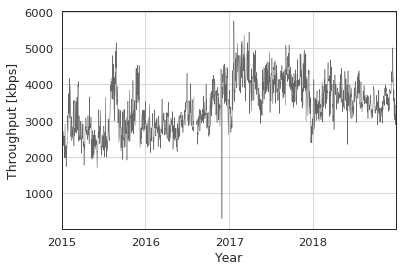

In [5]:
axes = dataset_throughput['downthpt'].plot(linewidth=0.5, colormap='Dark2_r', grid=True);
axes.set_ylabel('Throughput [kbps]')
axes.set_xlabel('Year')
axes.figure.savefig('./../output_file/yearly_throughput_trace.png')

Average Throughput to year

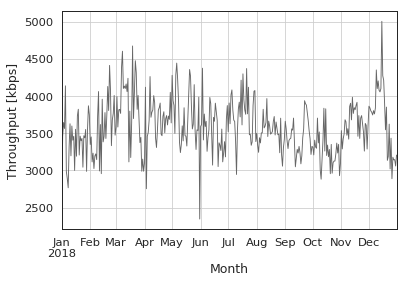

In [9]:
ax = dataset_throughput.loc['2018', 'downthpt'].plot(linewidth=0.9, colormap='Dark2_r', grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('Throughput [kbps]')
ax.figure.savefig('./../output_file/2018_throughput_trace.png');

# Seasonality

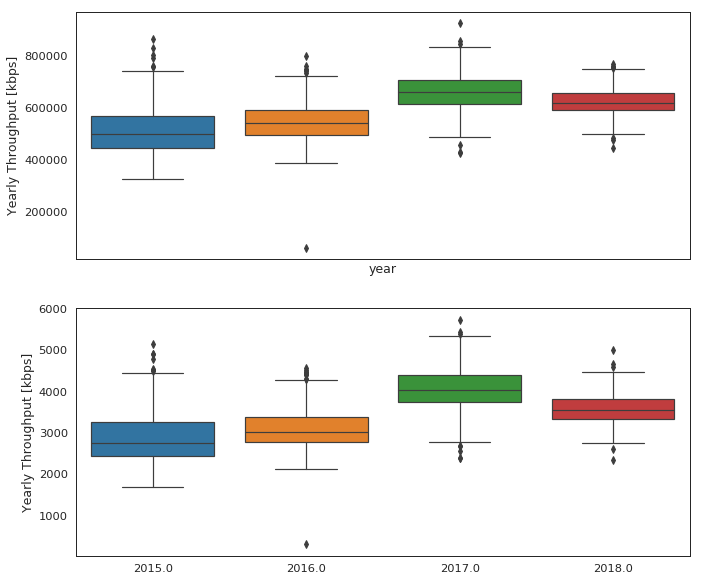

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['received', 'downthpt'], axes):
    sns.boxplot(data=dataset_throughput, x=dataset_throughput.year, y=name, ax=ax)
    ax.set_ylabel('Yearly Throughput [kbps]')
    # ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[0]:
        ax.set_xlabel('')

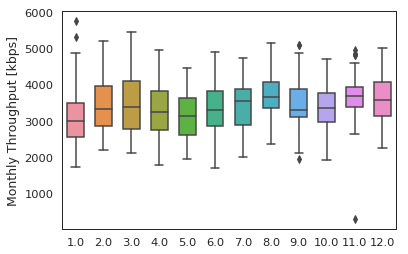

In [8]:
ax = sns.boxplot(data=dataset_throughput, x='month', y='downthpt', linewidth=1.5, width=0.6, saturation=0.80);
plt.xlabel('')
plt.ylabel('') 
ax.set_ylabel('Monthly Throughput [kbps]')
ax.figure.savefig('./../output_file/MonthlySeasonThroughput.eps');

# Trends

In [11]:
# Compute the centered 7-day rolling mean
throughput_7d = dataset_throughput['downthpt'].rolling(30, center=True).mean()

In [12]:
throughput_365d = dataset_throughput['downthpt'].rolling(window=365, center=True, min_periods=360).mean()

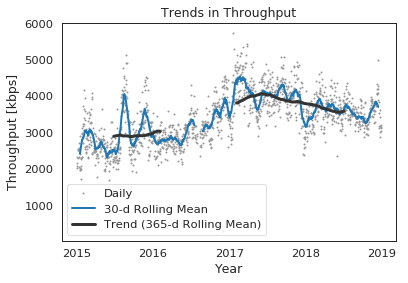

In [14]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(dataset_throughput['downthpt'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(throughput_7d, linewidth=2, label='30-d Rolling Mean')
ax.plot(throughput_365d, color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Throughput [kbps]')
ax.set_title('Trends in Throughput')
ax.figure.savefig('./../output_file/TrendsThroughput.eps');

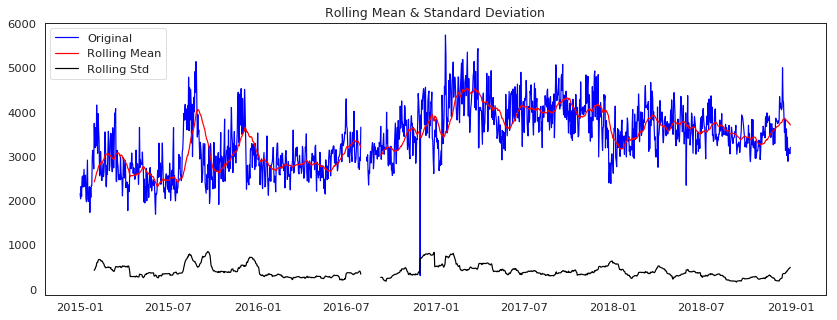

<Resultados of Dickey-Fuller Test>


MissingDataError: exog contains inf or nans

In [16]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.savefig('./../output_file/StationarityThroughput.eps')
    plt.show()
    
    print ('<Resultados of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Teste Estatístico','p-value','#Lags Used','Numero de observações usada'])
    for key,value in dftest[4].items():
        dfoutput['Valor Crítico (%s)'%key] = value
    print(dfoutput)
test_stationarity(dataset_throughput.downthpt)

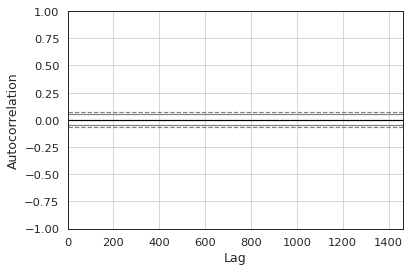

In [18]:
autocorrelation_plot(dataset_throughput)
plt.show()

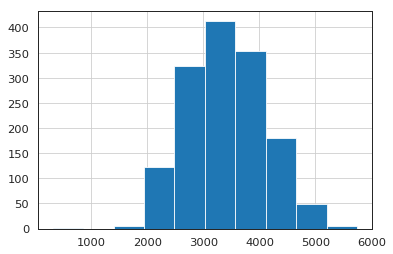

In [13]:
data.downthpt.hist()
plt.savefig('./../output_file/histogram.png')
plt.show()